In [1]:
import os, sys

# find repo root (looks for liars_poker/ or pyproject.toml)
def find_repo_root(start_dir: str) -> str:
    cur = os.path.abspath(start_dir)
    for _ in range(6):
        if os.path.isdir(os.path.join(cur, "liars_poker")) or os.path.exists(os.path.join(cur, "pyproject.toml")):
            return cur
        parent = os.path.dirname(cur)
        if parent == cur:
            break
        cur = parent
    return os.path.abspath(os.path.join(start_dir, "..", ".."))

NB_DIR = os.getcwd()
REPO_ROOT = find_repo_root(NB_DIR)
if REPO_ROOT not in sys.path:
    sys.path.insert(0, REPO_ROOT)

ARTIFACTS_ROOT = os.path.join(REPO_ROOT, "artifacts")
os.makedirs(ARTIFACTS_ROOT, exist_ok=True)

print("repo root   :", REPO_ROOT)
print("artifacts   :", ARTIFACTS_ROOT)


repo root   : c:\Users\adidh\Documents\liars_poker
artifacts   : c:\Users\adidh\Documents\liars_poker\artifacts


In [2]:
from liars_poker import (
    GameSpec, Env, InfoSet, Rules,
    Policy, TabularPolicy, CommitOnceMixture, RandomPolicy,
    eval_both_seats
)

from liars_poker.training.fsp import fsp_loop
from liars_poker.algo.br_exact_efficient import best_response_exact as best_response_efficient
from liars_poker.algo.br_exact import best_response_exact

In [48]:
spec = GameSpec(ranks=10, suits=4, hand_size=2, claim_kinds=("RankHigh", "Pair"), suit_symmetry=True)
rules = Rules(spec)

In [49]:
from liars_poker.core import possible_starting_hands
len(possible_starting_hands(spec))

55

In [53]:
rules._build_claims()

(('RankHigh', 1),
 ('RankHigh', 2),
 ('RankHigh', 3),
 ('RankHigh', 4),
 ('RankHigh', 5),
 ('RankHigh', 6),
 ('RankHigh', 7),
 ('RankHigh', 8),
 ('RankHigh', 9),
 ('RankHigh', 10),
 ('Pair', 1),
 ('Pair', 2),
 ('Pair', 3),
 ('Pair', 4),
 ('Pair', 5),
 ('Pair', 6),
 ('Pair', 7),
 ('Pair', 8),
 ('Pair', 9),
 ('Pair', 10))

In [28]:
answer, debug = fsp_loop(spec, best_response_exact, 1000, episodes_test=1)

Predicted exploitability: avg=0.7400 (first=0.8000, second=0.6800)
Sampled exploitability: avg=1.0000, chi2 p-value=0.5533

Predicted exploitability: avg=0.7175 (first=0.8000, second=0.6350)
Sampled exploitability: avg=1.0000, chi2 p-value=0.5303

Predicted exploitability: avg=0.6450 (first=0.8000, second=0.4900)
Sampled exploitability: avg=1.0000, chi2 p-value=0.4582

Predicted exploitability: avg=0.6087 (first=0.8000, second=0.4175)
Sampled exploitability: avg=1.0000, chi2 p-value=0.4227

Predicted exploitability: avg=0.5870 (first=0.8000, second=0.3740)
Sampled exploitability: avg=0.0000, chi2 p-value=0.2332

Predicted exploitability: avg=0.5725 (first=0.8000, second=0.3450)
Sampled exploitability: avg=1.0000, chi2 p-value=0.3875

Predicted exploitability: avg=0.5621 (first=0.8000, second=0.3243)
Sampled exploitability: avg=0.0000, chi2 p-value=0.2572

Predicted exploitability: avg=0.5544 (first=0.8000, second=0.3087)
Sampled exploitability: avg=1.0000, chi2 p-value=0.3699

Predicte

In [ ]:
# answer1, info1 = fsp_loop(spec, best_response_efficient, 300, episodes_test=1)

Predicted exploitability: avg=0.8841 (first=0.9063, second=0.8619)
Sampled exploitability: avg=0.0000, chi2 p-value=0.005753

Predicted exploitability: avg=0.8022 (first=0.8183, second=0.7861)
Sampled exploitability: avg=0.0000, chi2 p-value=0.04401

Predicted exploitability: avg=0.7358 (first=0.8167, second=0.6549)
Sampled exploitability: avg=1.0000, chi2 p-value=0.549

Predicted exploitability: avg=0.6935 (first=0.7792, second=0.6079)
Sampled exploitability: avg=0.0000, chi2 p-value=0.1325

Predicted exploitability: avg=0.6548 (first=0.7300, second=0.5796)
Sampled exploitability: avg=1.0000, chi2 p-value=0.4678

Predicted exploitability: avg=0.6405 (first=0.7203, second=0.5608)
Sampled exploitability: avg=1.0000, chi2 p-value=0.4538

Predicted exploitability: avg=0.6385 (first=0.7221, second=0.5548)
Sampled exploitability: avg=0.0000, chi2 p-value=0.1839

Predicted exploitability: avg=0.6298 (first=0.6913, second=0.5683)
Sampled exploitability: avg=1.0000, chi2 p-value=0.4432

Predic

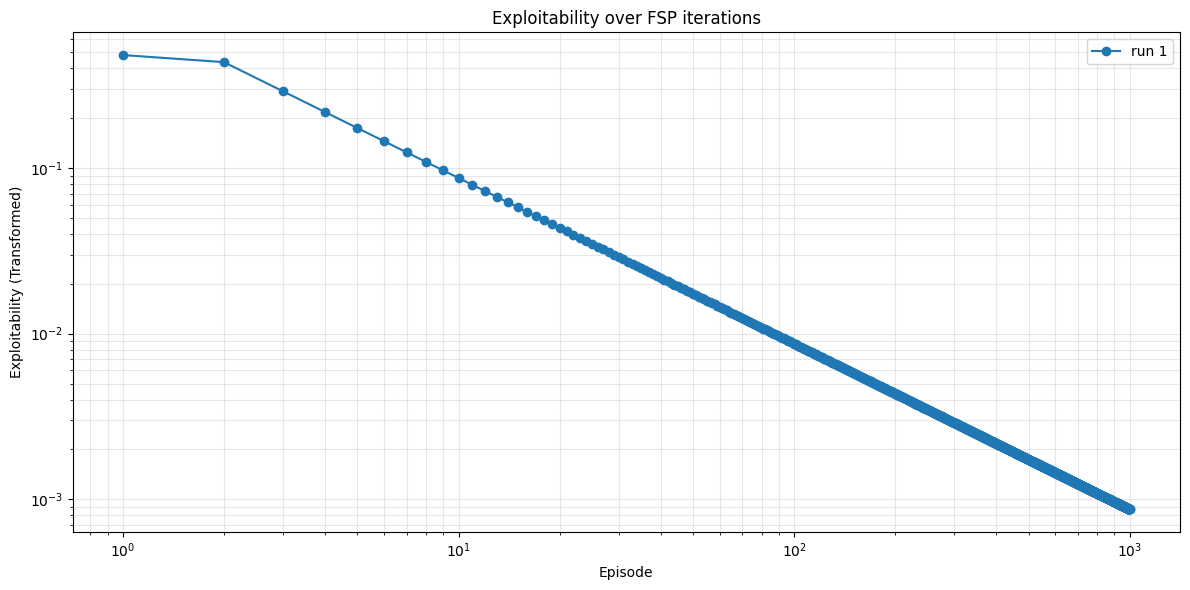

In [29]:
from liars_poker.training.fsp import plot_exploitability_series
ax = plot_exploitability_series([debug], average=True, figsize=(12, 6), transform=True)
# or plot_exploitability_series(info, average=False)


In [30]:
from liars_poker.serialization import save_policy
save_dir = "C:/Users/adidh/Documents/liars_poker/artifacts/my_test_policy_5"

# 3. Save
# This will create 'policy.npz' (heavy data) and 'spec.json' (metadata) inside the folder
save_policy(answer, save_dir)

In [45]:
answer.policies[1].probs

{InfoSet(pid=0, hand=(0, 1), history=(0, 1, 2, 3)): {4: 1.0},
 InfoSet(pid=0, hand=(0, 1), history=(0, 1, 2, 4)): {-1: 1.0},
 InfoSet(pid=0, hand=(0, 1), history=(0, 1, 3, 4)): {-1: 1.0},
 InfoSet(pid=0, hand=(0, 1), history=(0, 1)): {4: 1.0},
 InfoSet(pid=0, hand=(0, 1), history=(0, 2, 3, 4)): {-1: 1.0},
 InfoSet(pid=0, hand=(0, 1), history=(0, 2)): {4: 1.0},
 InfoSet(pid=0, hand=(0, 1), history=(0, 3)): {4: 1.0},
 InfoSet(pid=0, hand=(0, 1), history=(0, 4)): {-1: 1.0},
 InfoSet(pid=0, hand=(0, 1), history=(1, 2, 3, 4)): {-1: 1.0},
 InfoSet(pid=0, hand=(0, 1), history=(1, 2)): {4: 1.0},
 InfoSet(pid=0, hand=(0, 1), history=(1, 3)): {4: 1.0},
 InfoSet(pid=0, hand=(0, 1), history=(1, 4)): {-1: 1.0},
 InfoSet(pid=0, hand=(0, 1), history=(2, 3)): {4: 1.0},
 InfoSet(pid=0, hand=(0, 1), history=(2, 4)): {-1: 1.0},
 InfoSet(pid=0, hand=(0, 1), history=(3, 4)): {-1: 1.0},
 InfoSet(pid=0, hand=(0, 1), history=()): {0: 1.0},
 InfoSet(pid=0, hand=(0, 2), history=(0, 1, 2, 3)): {4: 1.0},
 InfoSet